In [45]:
# Import libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../Churn_Model/data/cleaned_orders.csv')

In [55]:
# Describe the dataset
print(df.describe())

       Delivery Duration   Postal Code         Sales     Quantity  \
count        9994.000000   9994.000000   9994.000000  9994.000000   
mean            3.958175  55190.379428    229.858001     3.789574   
std             1.747567  32063.693350    623.245101     2.225110   
min             0.000000   1040.000000      0.444000     1.000000   
25%             3.000000  23223.000000     17.280000     2.000000   
50%             4.000000  56430.500000     54.490000     3.000000   
75%             5.000000  90008.000000    209.940000     5.000000   
max             7.000000  99301.000000  22638.480000    14.000000   

          Discount  Discount Value       Profit          COGS     Returned  
count  9994.000000     9994.000000  9994.000000   9994.000000  9994.000000  
mean      0.156203      -32.277580    28.656896   -168.923525     0.080048  
std       0.206452      164.025577   234.260108    430.869751     0.271381  
min       0.000000   -11319.240000 -6599.978000 -13130.318400     0.00

Business Overall

In [48]:
# Calculate Overall Return Rate
total_orders = df['Order ID'].nunique()
returned_orders = df[df['Returned'] == 1]['Order ID'].nunique() # Yes = 1, No = 0
overall_return_rate = (returned_orders / total_orders) * 100

print(f"Total unique orders: {total_orders}")
print(f"Total unique returned orders: {returned_orders}")
print(f"Overall Return Rate: {overall_return_rate:.2f}%")

Total unique orders: 5009
Total unique returned orders: 296
Overall Return Rate: 5.91%


In [52]:
# Calculate Profit
average_profit = df['Profit'].mean()
negative_profit_orders = df[df['Profit'] < 0].shape[0]
percentage_negative_profit = (negative_profit_orders / df.shape[0]) * 100

print(f"Average Profit per order: ${average_profit:.2f}")
print(f"Percentage of orders with negative profit: {percentage_negative_profit:.2f}%\n")

Average Profit per order: $28.66
Percentage of orders with negative profit: 18.72%



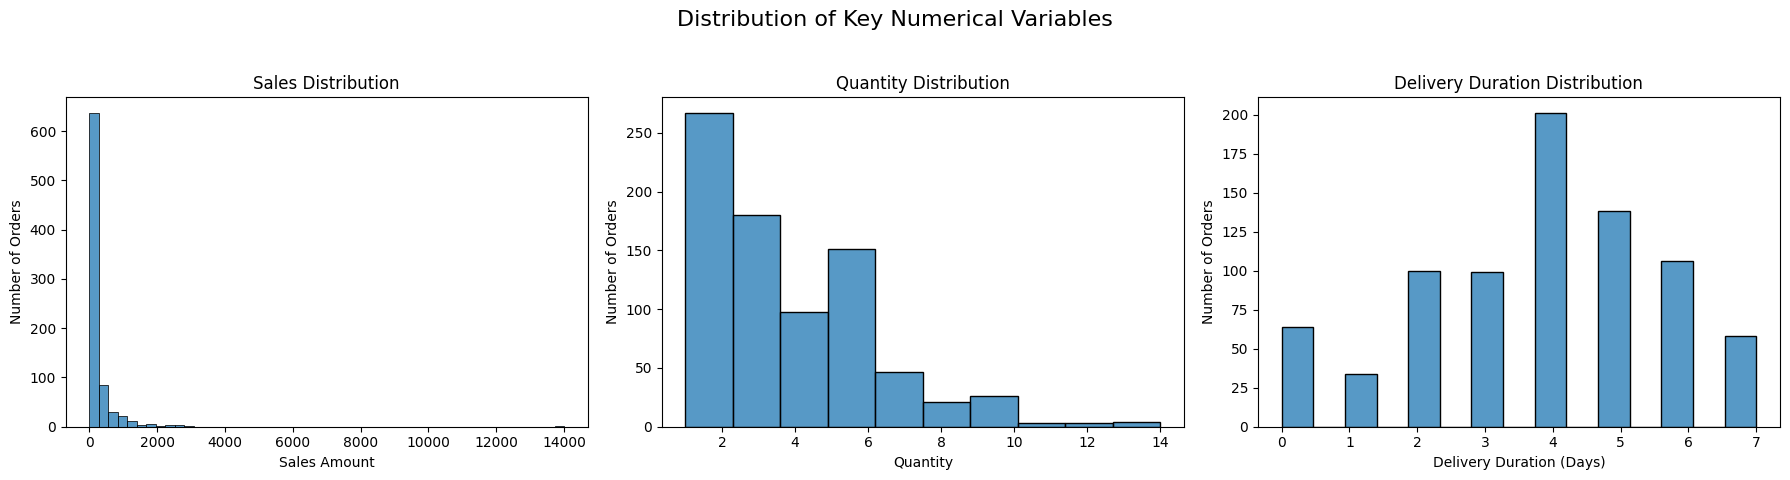

In [53]:
# Order Distribution (Histograms)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribution of Key Numerical Variables', fontsize=16)

sns.histplot(merged_df['Sales'], bins=50, ax=axes[0])
axes[0].set_title('Sales Distribution')
axes[0].set_xlabel('Sales Amount')
axes[0].set_ylabel('Number of Orders')

sns.histplot(merged_df['Quantity'], bins=10, ax=axes[1])
axes[1].set_title('Quantity Distribution')
axes[1].set_xlabel('Quantity')
axes[1].set_ylabel('Number of Orders')

sns.histplot(merged_df['Delivery Duration'], bins=15, ax=axes[2])
axes[2].set_title('Delivery Duration Distribution')
axes[2].set_xlabel('Delivery Duration (Days)')
axes[2].set_ylabel('Number of Orders')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Churn Analysis

In [57]:
# a) Return Rate by Product Category
return_rate_by_category = df.groupby('Category')['Returned'].mean().sort_values(ascending=False) * 100
print("Return Rate by Product Category (%):")
print(return_rate_by_category.to_markdown(numalign="left", stralign="left"))

# b) Return Rate by Product Sub-Category
return_rate_by_sub_category = df.groupby('Sub-Category')['Returned'].mean().sort_values(ascending=False).head(10) * 100
print("\nTop 10 Return Rates by Sub-Category (%):")
print(return_rate_by_sub_category.to_markdown(numalign="left", stralign="left"))

# c) Geographic Churn
# We'll analyze by region for simplicity
return_rate_by_region = df.groupby('Region')['Returned'].mean().sort_values(ascending=False) * 100
print("\nReturn Rate by Region (%):")
print(return_rate_by_region.to_markdown(numalign="left", stralign="left"))

Return Rate by Product Category (%):
| Category        | Returned   |
|:----------------|:-----------|
| Technology      | 8.44613    |
| Furniture       | 8.06223    |
| Office Supplies | 7.84932    |

Top 10 Return Rates by Sub-Category (%):
| Sub-Category   | Returned   |
|:---------------|:-----------|
| Machines       | 11.3043    |
| Tables         | 9.40439    |
| Binders        | 8.9954     |
| Paper          | 8.9781     |
| Fasteners      | 8.75576    |
| Phones         | 8.66142    |
| Chairs         | 8.58995    |
| Appliances     | 8.58369    |
| Supplies       | 8.42105    |
| Accessories    | 7.87097    |

Return Rate by Region (%):
| Region   | Returned   |
|:---------|:-----------|
| West     | 15.2982    |
| East     | 5.23174    |
| South    | 4.25926    |
| Central  | 3.9604     |


Top 10 Customers by Number of Orders:
| Customer ID   | Order ID   |
|:--------------|:-----------|
| WB-21850      | 37         |
| PP-18955      | 34         |
| JL-15835      | 34         |
| MA-17560      | 34         |
| SV-20365      | 32         |
| JD-15895      | 32         |
| CK-12205      | 32         |
| EH-13765      | 32         |
| EP-13915      | 31         |
| ZC-21910      | 31         |

Top 10 Customers by Total Sales:
| Customer ID   | Sales   |
|:--------------|:--------|
| SM-20320      | 25043   |
| TC-20980      | 19052.2 |
| RB-19360      | 15117.3 |
| TA-21385      | 14595.6 |
| AB-10105      | 14473.6 |
| KL-16645      | 14175.2 |
| SC-20095      | 14142.3 |
| HL-15040      | 12873.3 |
| SE-20110      | 12209.4 |
| CC-12370      | 12129.1 |


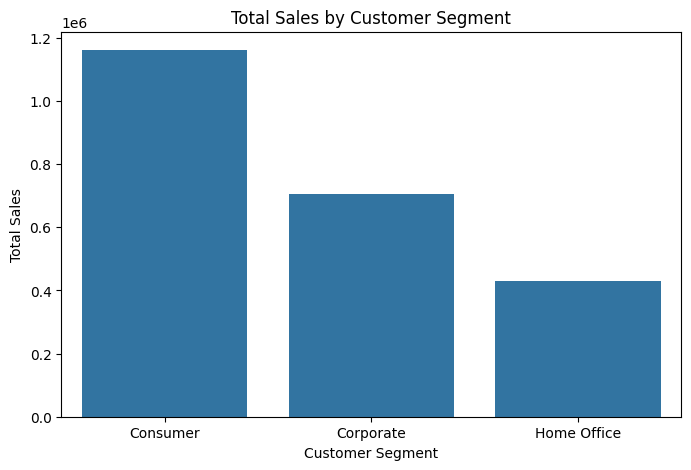

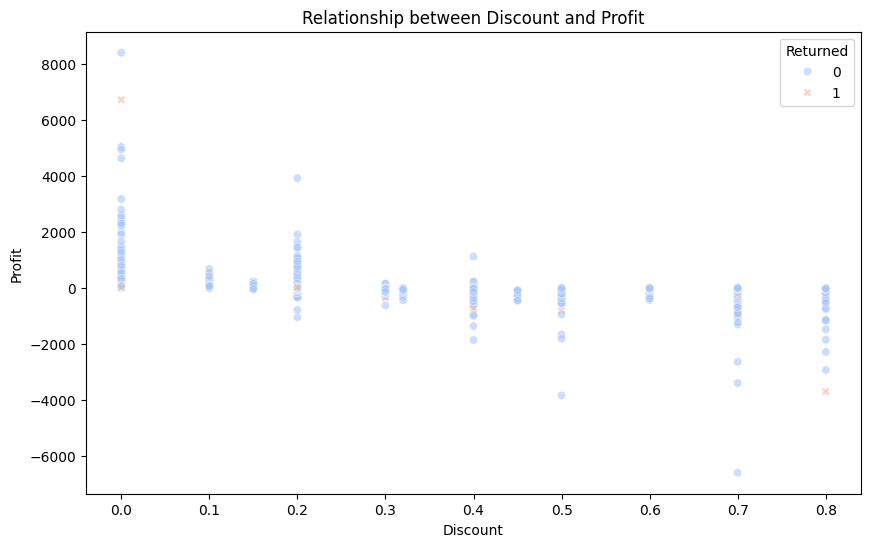

In [59]:
# Customer and Sales Insights

# a) Top Customers
top_customers_by_orders = df.groupby('Customer ID')['Order ID'].count().sort_values(ascending=False).head(10)
top_customers_by_sales = df.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False).head(10)

print("Top 10 Customers by Number of Orders:")
print(top_customers_by_orders.to_markdown(numalign="left", stralign="left"))
print("\nTop 10 Customers by Total Sales:")
print(top_customers_by_sales.to_markdown(numalign="left", stralign="left"))

# b) Sales by Segment (Bar Chart)
sales_by_segment = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_segment.index, y=sales_by_segment.values)
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.show()

# c) Discount vs. Profit (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df, hue='Returned', style='Returned', palette='coolwarm', alpha=0.6)
plt.title('Relationship between Discount and Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

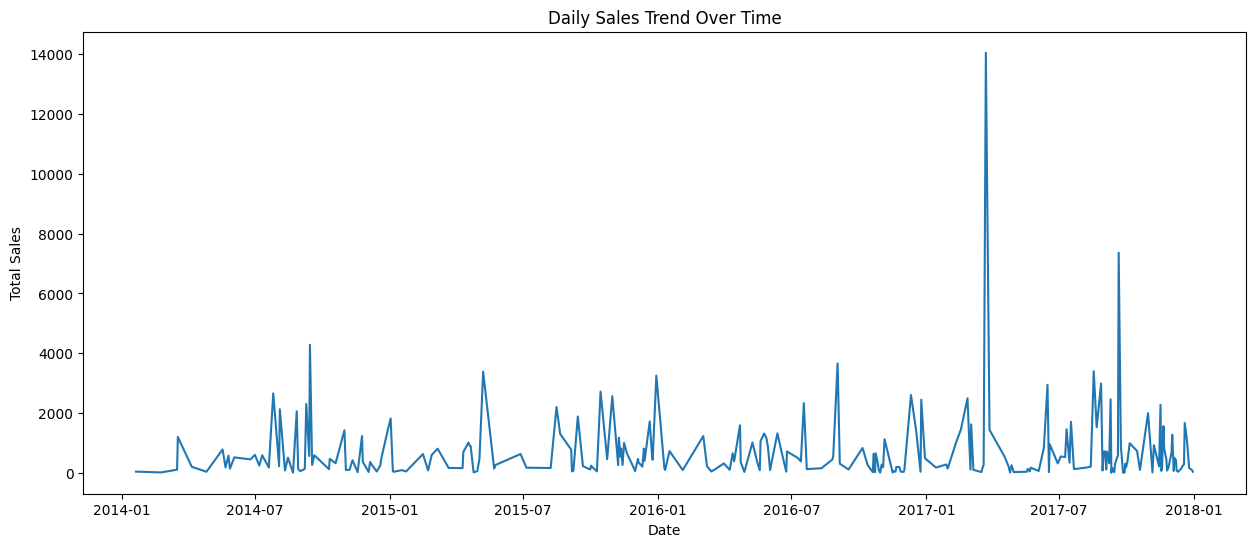

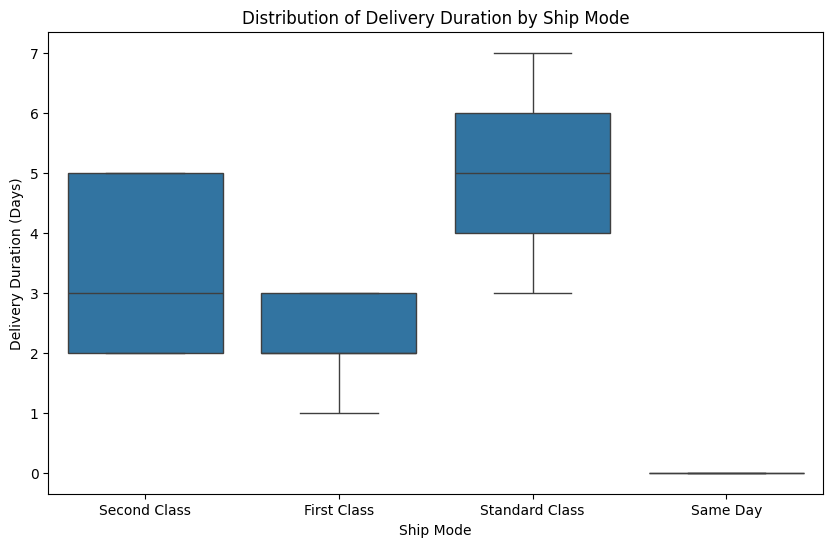

In [61]:
# Time-Series Analysis

# a) Sales Trend over time
merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'])
daily_sales = merged_df.groupby('Order Date')['Sales'].sum().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(x='Order Date', y='Sales', data=daily_sales)
plt.title('Daily Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

# b) Delivery Duration by Ship Mode (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ship Mode', y='Delivery Duration', data=merged_df)
plt.title('Distribution of Delivery Duration by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Delivery Duration (Days)')
plt.show()